In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"anirban1004","key":"08aec4d20b7a28d230d724dfb0dde62f"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
twitter-entity-sentiment-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile
zip = zipfile.ZipFile("/content/twitter-entity-sentiment-analysis.zip",'r')
zip.extractall("/content")
zip.close()

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
df=pd.read_csv("/content/twitter_training.csv")

In [4]:
df.sample(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
63034,7605,MaddenNFL,Negative,us
59991,3481,Facebook,Negative,Facebook is the most annoying thing ever I mad...
17234,9755,PlayStation5(PS5),Positive,I think it looks interesting - at least it's t...
14122,2821,Dota2,Irrelevant,the
10860,13068,Xbox(Xseries),Negative,"I hate this game. EVERY ONE YEAR, YOUR STRENGT..."


In [5]:
df = df.rename(columns={'2401': 'Tweet ID','Borderlands': 'entity','Positive':'Sentiment','im getting on borderlands and i will murder you all ,':'Tweet'})

In [6]:
print(df['entity'].unique())
print(df['Tweet ID'].unique())

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']
[2401 2402 2403 ... 9198 9199 9200]


In [7]:
df

,Tweet ID,entity,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
df.isnull().sum()

,0
Tweet ID,0
entity,0
Sentiment,0
Tweet,686


In [9]:
df.shape

(74681, 4)

## Data cleaning

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
Tweet ID,0
entity,0
Sentiment,0
Tweet,0


<Axes: xlabel='Sentiment', ylabel='count'>

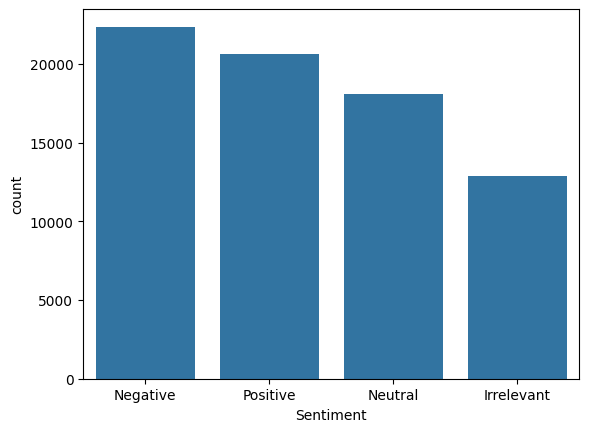

In [12]:
sns.barplot(df['Sentiment'].value_counts())

In [13]:
df['Sentiment'].value_counts()

,count
Sentiment,
Negative,22358
Positive,20654
Neutral,18108
Irrelevant,12875


In [14]:
df_test=pd.read_csv("/content/twitter_validation.csv")

In [15]:
df_test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [16]:
df_test = df_test.rename(columns={'3645': 'Tweet ID','Fcaebook': 'entity','Irrelevant':'Sentiment','I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣':'Tweet'})

In [17]:
df_test.head()

,3364,Facebook,Sentiment,Tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [18]:
pip install emoji

## Text Preprocessing

In [19]:
df_test.shape

(999, 4)

In [20]:
df_train=df[['Tweet','Sentiment']]
df_train.head()


,Tweet,Sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [21]:
df_test_final=df_test[['Tweet','Sentiment']]
df_test_final.head()

,Tweet,Sentiment
0,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral
1,@Microsoft Why do I pay for WORD when it funct...,Negative
2,"CSGO matchmaking is so full of closet hacking,...",Negative
3,Now the President is slapping Americans in the...,Neutral
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,Negative


In [22]:
import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

In [23]:
def preprocess_text(df, text_column):
    """
    Preprocesses text data in a specified column of a DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame containing text data.
        text_column (str): Name of the column with text data to preprocess.

    Returns:
        pd.DataFrame: DataFrame with the processed text column.
    """

    def clean_text(text):
        # Convert to lowercase
        text = text.lower()

        # Remove HTML tags
        text = BeautifulSoup(text, "html.parser").get_text()

        # Remove URLs
        text = re.sub(r'http\S+|www\.\S+', '', text)

        # Replace emojis with their textual meaning
        text = emoji.demojize(text)

        # Remove punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))



        return text

    # Apply the cleaning function to the specified column
    df[text_column] = df[text_column].astype(str).apply(clean_text)

    return df

In [24]:
df_train = preprocess_text(df_train, 'Tweet')
print(df_train)

<ipython-input-23-d76a54e0502d>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


                                                   Tweet Sentiment
0      i am coming to the borders and i will kill you...  Positive
1      im getting on borderlands and i will kill you all  Positive
2      im coming on borderlands and i will murder you...  Positive
3      im getting on borderlands 2 and i will murder ...  Positive
4      im getting into borderlands and i can murder y...  Positive
...                                                  ...       ...
74676  just realized that the windows partition of my...  Positive
74677  just realized that my mac window partition is ...  Positive
74678  just realized the windows partition of my mac ...  Positive
74679  just realized between the windows partition of...  Positive
74680  just like the windows partition of my mac is l...  Positive

[73995 rows x 2 columns]


<ipython-input-23-d76a54e0502d>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str).apply(clean_text)


In [25]:
df_test_final = preprocess_text(df_test_final, 'Tweet')
print(df_test_final)

<ipython-input-23-d76a54e0502d>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


                                                 Tweet   Sentiment
0    bbc news  amazon boss jeff bezos rejects claim...     Neutral
1    microsoft why do i pay for word when it functi...    Negative
2    csgo matchmaking is so full of closet hacking ...    Negative
3    now the president is slapping americans in the...     Neutral
4    hi eahelp i’ve had madeleine mccann in my cell...    Negative
..                                                 ...         ...
994  star toronto is the arts and culture capital o...  Irrelevant
995  this is actually a good move tot bring more vi...  Irrelevant
996  today sucked so it’s time to drink wine n play...    Positive
997    bought a fraction of microsoft today small wins    Positive
998  johnson  johnson to stop selling talc baby pow...     Neutral

[999 rows x 2 columns]


<ipython-input-23-d76a54e0502d>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str).apply(clean_text)


In [26]:
## removing stopwords from the review column

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [29]:
def advanced_text_processing(df, text_column):
    """
    Performs advanced text processing: removes stopwords, tokenizes, corrects spellings, and stems words.

    Parameters:
        df (pd.DataFrame): Input DataFrame containing text data.
        text_column (str): Name of the column with text data to process.

    Returns:
        pd.DataFrame: DataFrame with tokenized and processed text.
    """
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    def process_text(text):
        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]

        # Correct spelling


        # Stem the words
        tokens = [stemmer.stem(word) for word in tokens]

        return tokens

    # Apply processing to the specified column
    df[text_column] = df[text_column].astype(str).apply(process_text)

    return df


In [30]:
df_train = advanced_text_processing(df_train, 'Tweet')
print(df_train)

                                                   Tweet Sentiment
0                                   [come, border, kill]  Positive
1                            [im, get, borderland, kill]  Positive
2                         [im, come, borderland, murder]  Positive
3                       [im, get, borderland, 2, murder]  Positive
4                          [im, get, borderland, murder]  Positive
...                                                  ...       ...
74676  [realiz, window, partit, mac, like, 6, year, b...  Positive
74677  [realiz, mac, window, partit, 6, year, behind,...  Positive
74678  [realiz, window, partit, mac, 6, year, behind,...  Positive
74679  [realiz, window, partit, mac, like, 6, year, b...  Positive
74680  [like, window, partit, mac, like, 6, year, beh...  Positive

[73995 rows x 2 columns]


<ipython-input-29-47d5b52baf7e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str).apply(process_text)


In [31]:
df_test_final = advanced_text_processing(df_test_final, 'Tweet')
print(df_test_final)

                                                 Tweet   Sentiment
0    [bbc, news, amazon, boss, jeff, bezo, reject, ...     Neutral
1    [microsoft, pay, word, function, poorli, samsu...    Negative
2    [csgo, matchmak, full, closet, hack, truli, aw...    Negative
3    [presid, slap, american, face, realli, commit,...     Neutral
4    [hi, eahelp, ’, madelein, mccann, cellar, past...    Negative
..                                                 ...         ...
994  [star, toronto, art, cultur, capit, canada, ’,...  Irrelevant
995  [actual, good, move, tot, bring, viewer, one, ...  Irrelevant
996  [today, suck, ’, time, drink, wine, n, play, b...    Positive
997   [bought, fraction, microsoft, today, small, win]    Positive
998  [johnson, johnson, stop, sell, talc, babi, pow...     Neutral

[999 rows x 2 columns]


<ipython-input-29-47d5b52baf7e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str).apply(process_text)


In [32]:
## concatenate the two dataframes
df_combined = pd.concat([df_train, df_test_final], ignore_index=True)
df_combined

,Tweet,Sentiment
0,"[come, border, kill]",Positive
1,"[im, get, borderland, kill]",Positive
2,"[im, come, borderland, murder]",Positive
3,"[im, get, borderland, 2, murder]",Positive
4,"[im, get, borderland, murder]",Positive
...,...,...
74989,"[star, toronto, art, cultur, capit, canada, ’,...",Irrelevant
74990,"[actual, good, move, tot, bring, viewer, one, ...",Irrelevant
74991,"[today, suck, ’, time, drink, wine, n, play, b...",Positive
74992,"[bought, fraction, microsoft, today, small, win]",Positive


In [33]:
len(df_combined['Tweet'][50])

17

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [35]:
from sklearn.model_selection import train_test_split

In [50]:
X=df_combined['Tweet']
y=df_combined['Sentiment']
# 1. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train = [' '.join(tokens) for tokens in X_train]
X_test=[' '.join(tokens) for tokens in X_test]

In [38]:
all_tokens = [word for review in df_combined['Tweet'] for word in review]
vocabulary = set(all_tokens)
print("vocabulary_size: ",len(vocabulary))

vocabulary_size:  33704


In [52]:
tfidf = TfidfVectorizer(max_features=5000)  # Adjust `max_features` based on your dataset
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()


In [76]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Converts strings to integers
y_test = label_encoder.transform(y_test)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,Dropout,Bidirectional,Embedding,LSTM
from tensorflow.keras.optimizers import Adam

In [53]:
X_train_final = X_train_tfidf.reshape(X_train_tfidf.shape[0], 1, X_train_tfidf.shape[1])
X_test_val = X_test_tfidf.reshape(X_test_tfidf.shape[0], 1, X_test_tfidf.shape[1])


In [73]:
model = Sequential()

model.add(LSTM(64,input_shape=(1,5000)))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │       1,296,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,303,012 (4.97 MB)

 Trainable params: 1,303,012 (4.97 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
history = model.fit(X_train_final, y_train, validation_data=(X_test_val, y_test), epochs=20, batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5472 - loss: 1.0705 - val_accuracy: 0.7160 - val_loss: 0.7199
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7816 - loss: 0.5728 - val_accuracy: 0.8152 - val_loss: 0.5128
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8796 - loss: 0.3296 - val_accuracy: 0.8513 - val_loss: 0.4348
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9155 - loss: 0.2275 - val_accuracy: 0.8462 - val_loss: 0.5019
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9273 - loss: 0.1909 - val_accuracy: 0.8651 - val_loss: 0.4789
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9340 - loss: 0.1737 - val_accuracy: 0.8678 - val_loss: 0.5295
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9394 - loss: 0.1591 - val_accuracy: 0.8699 - val_loss: 0.5277
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9430 - loss: 0

In [79]:
loss, accuracy = model.evaluate(X_test_val, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8783 - loss: 0.7323
Test Loss: 0.7241544723510742
Test Accuracy: 0.8760583996772766


In [81]:
prediction = model.predict(X_test_val)
predicted_classes = prediction.argmax(axis=1)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [82]:
print(classification_report(y_test, predicted_classes, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

  Irrelevant       0.93      0.78      0.85      2636
    Negative       0.90      0.90      0.90      4439
     Neutral       0.81      0.90      0.85      3681
    Positive       0.88      0.89      0.89      4243

    accuracy                           0.88     14999
   macro avg       0.88      0.87      0.87     14999
weighted avg       0.88      0.88      0.88     14999



In [46]:
X_train_tfidf.shape[2]

5000

In [47]:
y_train

array([2, 1, 2, ..., 1, 3, 0])

In [48]:
from sklearn.linear_model import LogisticRegression

In [54]:
model=LogisticRegression()
model.fit(X_train_tfidf,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_pred=model.predict(X_test_tfidf)

In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [62]:
accuracy=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
accuracy

              precision    recall  f1-score   support

  Irrelevant       0.67      0.50      0.57      2636
    Negative       0.71      0.76      0.73      4439
     Neutral       0.62      0.65      0.63      3681
    Positive       0.68      0.71      0.70      4243

    accuracy                           0.67     14999
   macro avg       0.67      0.66      0.66     14999
weighted avg       0.67      0.67      0.67     14999



0.6741782785519035

In [58]:
from sklearn.ensemble import RandomForestClassifier


In [59]:
model2=RandomForestClassifier()
model2.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [61]:
y_pred2=model2.predict(X_test_tfidf)

In [63]:
accuracy=accuracy_score(y_test,y_pred2)
print(classification_report(y_test,y_pred2))
accuracy

              precision    recall  f1-score   support

  Irrelevant       0.94      0.81      0.87      2636
    Negative       0.91      0.91      0.91      4439
     Neutral       0.91      0.87      0.89      3681
    Positive       0.83      0.93      0.88      4243

    accuracy                           0.89     14999
   macro avg       0.90      0.88      0.89     14999
weighted avg       0.89      0.89      0.89     14999



0.8881258750583372

In [64]:
from sklearn.naive_bayes import MultinomialNB


In [65]:
nb=MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [66]:
y_pred3=nb.predict(X_test_tfidf)

In [67]:
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

0.6325755050336689
              precision    recall  f1-score   support

  Irrelevant       0.73      0.35      0.47      2636
    Negative       0.61      0.79      0.69      4439
     Neutral       0.67      0.53      0.59      3681
    Positive       0.62      0.73      0.67      4243

    accuracy                           0.63     14999
   macro avg       0.65      0.60      0.60     14999
weighted avg       0.65      0.63      0.62     14999



In [72]:
X_train_final.shape[2]

5000

In [83]:
import pickle
with open('model.pkl','wb') as file:
  pickle.dump(model,file)

In [84]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
import pickle
with open('model2.pkl','wb') as file:
  pickle.dump(model2,file)

In [86]:
from google.colab import files
files.download('model2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>